# Medical Image Processing with Python

This notebook will walk through a number of core image processing operations that you can perform using the Python libraries [Pillow](https://pypi.org/project/Pillow/) and [OpenCV](https://opencv.org/). 

If you'd like to follow along on your local computer, you can install these libraries with the following commands:

```
python3 -m pip install --upgrade pip
python3 -m pip install --upgrade Pillow
pip install opencv-python
```

We have some standard brain MRI images to work with throughout this notebook. Mainly, we have this comparison of a healthy vs. abnormal brain scan:

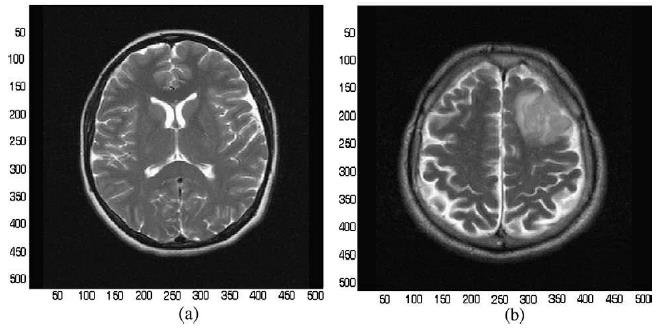

I've also split this image into two distinct ones for the left and right halves. Below are some variables that identify the current locations of our images.

In [28]:
import os 

HEALTHY_MRI_RAW_PNG = "./images/Healthy MRI Raw.png"
ABNORMAL_MRI_RAW_PNG = "./images/Abnormal MRI Raw.png"
HEALTHY_VS_ABNORMAL_MRI_RAW_PNG = "./images/MRI Healthy vs Abnormal Example.png"

# Check that all files exist before running
assert os.path.exists(HEALTHY_MRI_RAW_PNG)
assert os.path.exists(ABNORMAL_MRI_RAW_PNG)
assert os.path.exists(HEALTHY_VS_ABNORMAL_MRI_RAW_PNG)

Finally, let's import the libraries into the notebook.

In [34]:
from PIL import Image # Pillow
import cv2 # OpenCV
import matplotlib.pyplot as plt

## Loading and Displaying Images

The first order of business is to load an image into computer memory. We can use the `Image` class from Pillow to do that easily:

In [37]:
healthy_mri_image: Image = Image.open("./images/Healthy MRI Raw.png")

# Let's inspect some properties on the `Image` object
print(f"Object type: {type(healthy_mri_image)}")
print(f"Format: {healthy_mri_image.format}")
print(f"Size (in pixels): {healthy_mri_image.size}")
print(f"Mode: {healthy_mri_image.mode}")

Object type: <class 'PIL.PngImagePlugin.PngImageFile'>
Format: PNG
Size (in pixels): (293, 281)
Mode: L


The `mode` property has a value of `L`, which indicates that this is an 8-bit grayscale image. If this was a colored image, then the `mode` would likely be `RGB` (red-green-blue) or `RGBA` instead. The file format itself is a PNG, or **Portable Network Graphics**, which is a common, straightforward format for photos. It's generally important to understand some details of how the file format you're working with is designed, as it affects how you manipulate the image programmatically.

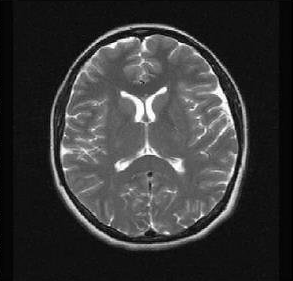

In [31]:
# Note: If we were writing regular Python code for the interpreter, the .show() method 
# would usually display our `Image` in a graphical user interface. However, because 
# this is a Jupyter notebook, we can simply return the variable from the current code
# cell and it will display it for us.

# healthy_mri_image.show()

healthy_mri_image

You can see we've got exactly our image! Let's see how we would load it with OpenCV in contrast.

In [38]:
healthy_mri_image_opencv = cv2.imread('./images/Healthy MRI Raw.png')

print(f"Object type: {type(healthy_mri_image_opencv)}")
print(f"Object shape: {healthy_mri_image_opencv.shape}")
print(f"Total pixels: {healthy_mri_image_opencv.size}")
print(f"Datatype: {healthy_mri_image_opencv.dtype}")

Object type: <class 'numpy.ndarray'>
Object shape: (281, 293, 3)
Total pixels: 246999
Datatype: uint8


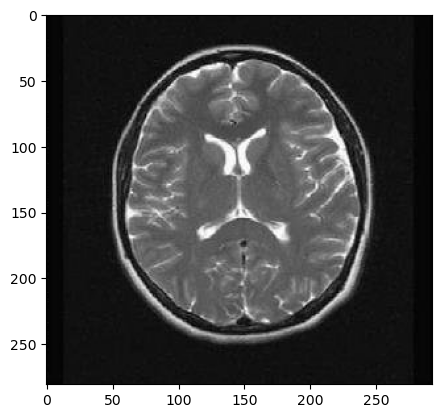

In [35]:
plt.imshow(healthy_mri_image_opencv)

The code is a little different between them; notably, Pillow uses an `Image` class to abstract away the details while OpenCV just returns a matrix representing the array of pixels. We can see this matrix too by simply returning the `health_mri_image_opencv` variable:

In [36]:
healthy_mri_image_opencv

array([[[ 9,  9,  9],
        [20, 20, 20],
        [11, 11, 11],
        ...,
        [16, 16, 16],
        [ 0,  0,  0],
        [ 3,  3,  3]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 7,  7,  7],
        [ 4,  4,  4],
        [ 9,  9,  9]],

       [[ 2,  2,  2],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [ 8,  8,  8],
        [ 4,  4,  4],
        [ 0,  0,  0]],

       ...,

       [[12, 12, 12],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [ 8,  8,  8],
        [ 5,  5,  5],
        [ 0,  0,  0]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 0,  0,  0]],

       [[ 6,  6,  6],
        [ 0,  0,  0],
        [ 5,  5,  5],
        ...,
        [ 0,  0,  0],
        [ 4,  4,  4],
        [ 5,  5,  5]]], dtype=uint8)

OpenCV takes advantage of the high-performance multi-dimensional arrays provided by the `numpy` library; the lack of abstraction makes it slightly harder to use, but also makes it more suitable for AI/ML algorithms.

## Image Manipulation

Both libraries make it easy to perform standard image manipulation operations.

### Rotating

The `PIL.Image.Image` class contains methods to `resize()` and `rotate()` an image. The former takes a tuple giving the new size, the latter the angle in degrees counter-clockwise.

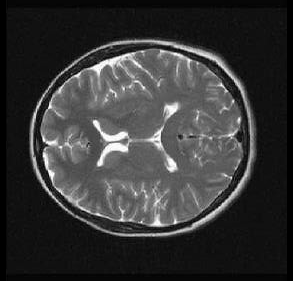

In [57]:
degrees_to_rotate = 90

healthy_mri_image.rotate(degrees_to_rotate)

You probably can't imagine a simpler way to do it than the way Pillow does. In comparison, OpenCV is more complex because it operates at a matrix level. You may or may not recall the concept of a **rotation matrix** from linear algebra, where a matrix can be rotated by angle $\theta$ when multipled by: 

$$
M = \begin{bmatrix}
\cos{\theta} & -\sin{\theta} \\
\sin{\theta} & \cos{\theta}
\end{bmatrix}
$$

OpenCV provides a function `getRotationMatrix2D()` which generates that matrix for a given angle, along with some slight modifications to adjust the center of rotation. Once we've produced that matrix, we can use the `warpAffine()` function to apply it to the image. See the code below: 

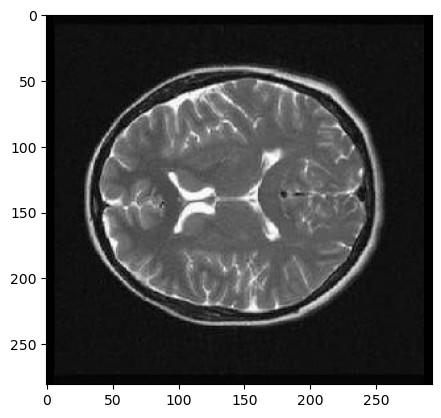

In [70]:
rows, cols, _ = healthy_mri_image_opencv.shape

rotation_matrix = cv2.getRotationMatrix2D(((cols - 1) / 2.0, (rows - 1) / 2.0), 90, 1)

rotated_image_result = cv2.warpAffine(healthy_mri_image_opencv, rotation_matrix, (cols, rows))

plt.imshow(rotated_image_result)

Of course, this is substantially harder than calling a single `rotate()` method on the image. As we go through this notebook, you'll notice a pattern of Pillow winning for simple and straightforward things, while OpenCV starts to shine when doing more complex AI/ML-driven tasks on images. 

### Resizing

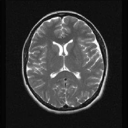

In [55]:
new_dimensions = (128, 128)

healthy_mri_image.resize(new_dimensions)

### Cropping
Pillow's `Image` class contains methods allowing you to manipulate regions within an image. To extract a sub-rectangle from an image, use the `crop()` method. We simply define a tuple with four numbers indicating how far into the image we want to crop, remembering that coordinate `(0, 0)` represents the top-left of the image.

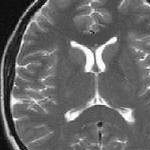

In [53]:
# Recall, the dimensions of this image are 281x293 pixels

box = (
    50,    # left
    50,    # right
    200,   # top
    200    # bottom
)

healthy_mri_image.crop(box)

## Image Enhancement

Let's look at how to apply simple enhancements such as adjusting the contrast, brightness, and sharpness of the image using Pillow. It provides an easy interface for this with the class `ImageEnhance` that works out-of-the-box:

In [58]:
from PIL import ImageEnhance, ImageFilter

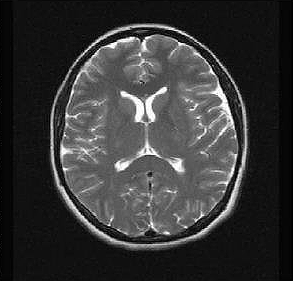

In [59]:
healthy_mri_image.filter(ImageFilter.DETAIL)

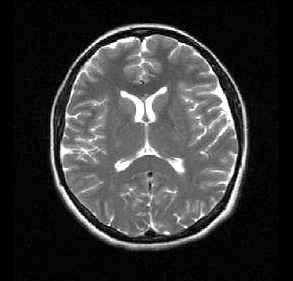

In [63]:
# Increase the image's contrast by 30%
ImageEnhance.Contrast(healthy_mri_image).enhance(1.3)

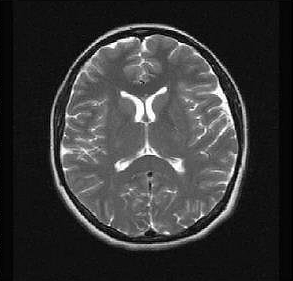

In [66]:
# Increase the image's sharpness by 50%
ImageEnhance.Sharpness(healthy_mri_image).enhance(1.5)

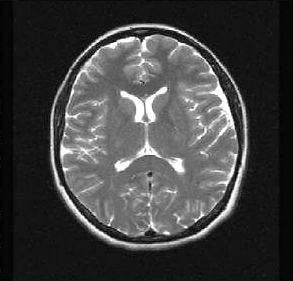

In [67]:
# Increase the image's brightness by 20%
ImageEnhance.Brightness(healthy_mri_image).enhance(1.2)

## Image Segmentation

Image segmentation is a process in image processing that divides an image into multiple segments or sets of pixels, often referred to as "regions" or "superpixels". Each of these segments represents a distinct part of the image, making it easier to analyze and interpret. In medicine, it may be used to delineate tissues and organs, detect disease, estimate volumes (e.g. of tumors), and possibly even plan treatment. Let's look into how we can perform this technique in OpenCV.

In [72]:
gray = cv2.cvtColor(healthy_mri_image_opencv, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [74]:
import numpy as np